##1. Convolutional Neural Networks

In [5]:
import pandas as pd
import numpy as np
from scipy import misc
from matplotlib import pylab as plt
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
import matplotlib.cm as cm

import tensorflow as tf
from tensorflow import keras

import matplotlib.style
import matplotlib as mpl

In [6]:
import keras
keras . __version__

'2.9.0'

# a. Loading dataset

In [7]:
from keras . datasets import mnist
( train_X , train_Y ), ( test_X , test_Y ) = mnist . load_data ()

In [8]:
print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


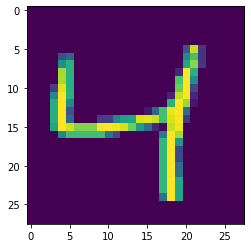

In [9]:
imshow(train_X[2])

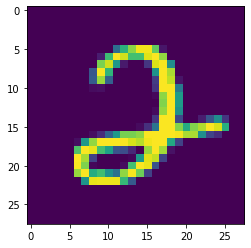

In [10]:
imshow(train_X[16])

# b. Preprocessing

- The output variable can be
converted into a one-hot vector to categorical
- Scale the pixel values such that they lie between 0.0 and 1.0 (make sure to use appropriate conversion to float)

In [11]:
#reshaping the date
train_X, test_X = train_X.reshape(-1,28,28,1), test_X.reshape(-1,28,28,1) 

In [12]:
#One hot vector
from keras.utils import to_categorical

train_Y = to_categorical(train_Y)
test_Y = to_categorical(test_Y)

In [13]:
#normalize the pixel value

train_X_norm = train_X.astype('float32')/255.0
test_X_norm = test_X.astype('float32')/255.0

In [14]:
print(train_X_norm.shape)
print(train_Y.shape)
print(test_X_norm.shape)
print(test_Y.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


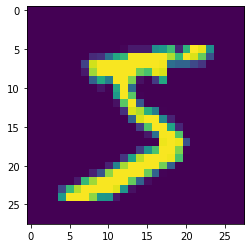

In [15]:
imshow(train_X_norm[0,:,:,0])

## c. Implementation

- A single convolutional layer with 3 x 3 sized window for computing the convolution, with 32 filters
- Maxpooling layer with 2 x 2 window size.
- Flatten resulting features to reshape your output appropriately
- Dense layer on top of this (100 neurons) with ReLU activation 
- Dense layer with 10 neurons for calculating softmax output (Our classification result will
output one of the ten possible classes, corresponding to our digits)

After definid the model, use Stochastic Gradient Descent (SGD) optimizer and cost-entropy loss to compile model with learning rate 0.01 and momentum 0.9.

In [17]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD

def create_cnn ():
# define using Sequential
  model = Sequential ( )
  # Convolution layer
  model.add(
    Conv2D(32,(3,3),
    activation= 'relu',
    kernel_initializer = 'he_uniform',
    input_shape =(28 , 28 , 1))
    )
  # Maxpooling layer
  model.add(MaxPooling2D( ( 2,2) ) )
  # Flatten output
  model.add(Flatten ( ) )
  # Dense layer of 100 neurons
  model.add(
    Dense (100 ,
    activation= 'relu' ,
    kernel_initializer = 'he_uniform' )
    )
  model.add(Dense(10 , activation= 'softmax'))
  # initialize optimizer
  opt = SGD(learning_rate =0.01 , momentum=0.9)
  # compile model
  model.compile(
    optimizer=opt ,
    loss= 'categorical_crossentropy' ,
    metrics =[ 'accuracy' ]
    )
  return model

In [24]:
model=create_cnn ()

In [25]:
print(model.layers)

[<keras.layers.convolutional.conv2d.Conv2D object at 0x7fe710e83c50>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7fe70ed2f150>, <keras.layers.reshaping.flatten.Flatten object at 0x7fe712240310>, <keras.layers.core.dense.Dense object at 0x7fe71224d590>, <keras.layers.core.dense.Dense object at 0x7fe70a96a950>]


## d. Training and Evaluating CNN

In [26]:
model.fit(train_X_norm, train_Y,batch_size =32,epochs =10,validation_split =0.1)

Epoch 1/10
1688/1688 [==============================] - 37s 21ms/step - loss: 0.1788 - accuracy: 0.9464 - val_loss: 0.0725 - val_accuracy: 0.9810
Epoch 2/10
1688/1688 [==============================] - 39s 23ms/step - loss: 0.0612 - accuracy: 0.9816 - val_loss: 0.0533 - val_accuracy: 0.9857
Epoch 3/10
1688/1688 [==============================] - 38s 22ms/step - loss: 0.0383 - accuracy: 0.9884 - val_loss: 0.0570 - val_accuracy: 0.9845
Epoch 4/10
1688/1688 [==============================] - 39s 23ms/step - loss: 0.0264 - accuracy: 0.9919 - val_loss: 0.0499 - val_accuracy: 0.9877
Epoch 5/10
1688/1688 [==============================] - 37s 22ms/step - loss: 0.0178 - accuracy: 0.9949 - val_loss: 0.0598 - val_accuracy: 0.9848
Epoch 6/10
1688/1688 [==============================] - 38s 23ms/step - loss: 0.0129 - accuracy: 0.9966 - val_loss: 0.0541 - val_accuracy: 0.9873
Epoch 7/10
1688/1688 [==============================] - 37s 22ms/step - loss: 0.0085 - accuracy: 0.9979 - val_loss: 0.0489 -

In [27]:
score = model.evaluate ( test_X_norm , test_Y , verbose =0)

In [28]:
print(score)

[0.04048396274447441, 0.9882000088691711]


# e. Experimentation

i) Run the above training for 50 epochs. Is there a steady improvement for both training and
validation accuracy?

In [29]:
from sklearn.model_selection import KFold

def evaluate_model(dataX, dataY):
  accuracy, val_accuracy = list(), list()
  # define model
  model2 = create_cnn()
  epoch_history = model2.fit(train_X_norm, train_Y,batch_size =32,epochs =50,
                             validation_split =0.1)
  for i in [0,9,19,29,39,49]:
    acc=epoch_history.history [ 'accuracy' ][i]
    val_acc=epoch_history.history [ 'val_accuracy' ][i]
		# stores accuracies
    accuracy.append(acc)
    val_accuracy.append(val_acc)
  return accuracy, val_accuracy

accuracy, val_accuracy=evaluate_model(train_X_norm, train_Y)

Epoch 1/50
1688/1688 [==============================] - 42s 24ms/step - loss: 0.1912 - accuracy: 0.9412 - val_loss: 0.0817 - val_accuracy: 0.9778
Epoch 2/50
1688/1688 [==============================] - 40s 24ms/step - loss: 0.0644 - accuracy: 0.9807 - val_loss: 0.0532 - val_accuracy: 0.9857
Epoch 3/50
1688/1688 [==============================] - 38s 22ms/step - loss: 0.0398 - accuracy: 0.9881 - val_loss: 0.0519 - val_accuracy: 0.9863
Epoch 4/50
1688/1688 [==============================] - 37s 22ms/step - loss: 0.0274 - accuracy: 0.9921 - val_loss: 0.0452 - val_accuracy: 0.9878
Epoch 5/50
1688/1688 [==============================] - 39s 23ms/step - loss: 0.0194 - accuracy: 0.9940 - val_loss: 0.0553 - val_accuracy: 0.9860
Epoch 6/50
1688/1688 [==============================] - 40s 24ms/step - loss: 0.0118 - accuracy: 0.9967 - val_loss: 0.0498 - val_accuracy: 0.9880
Epoch 7/50
1688/1688 [==============================] - 36s 22ms/step - loss: 0.0087 - accuracy: 0.9976 - val_loss: 0.0516 -

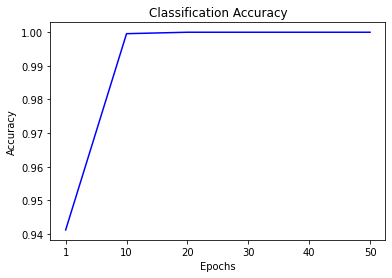

In [32]:
# visualize model performance

# plot accuracy
#plt.subplot(2, 1, 1)
plt.title('Classification Accuracy')
y_axis= ('1','10','20','30','40','50')
y_pos= np.arange(len(y_axis))
plt.plot(y_pos, accuracy, color='blue', label='train')
plt.xticks(y_pos, y_axis)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

Text(0, 0.5, 'Accuracy')

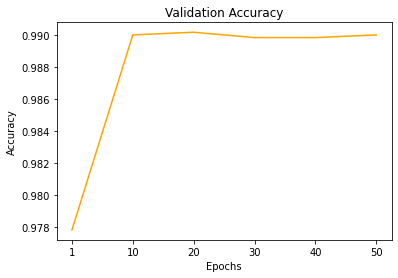

In [33]:
# plot validation accuracy
#plt.subplot(2, 1, 2)
plt.title('Validation Accuracy')
y_axis= ('1','10','20','30','40','50')
y_pos= np.arange(len(y_axis))
plt.plot(y_pos, val_accuracy, color='orange', label='validation')
plt.xticks(y_pos, y_axis)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
 

As we can see from the accuracy plot above, starting from epoch 1 to 10, our train accuracy is already quite high around 0.97-0.99 with steady improvement. However, we can see that training accuracy becomes very steady at 1.00 starting from epoch 13.

On the other hand, for validation accuracy, steady improvement is found from epoch 1 to 15 but slightly decreasing afterwards with 
some minor fluctuation that might indicates overfitting since our model doesn't learn the data but just memorizes it.

ii) Dropout to avoid overfitting

In [23]:
from keras.layers import Dropout

def create_cnn2 ():
# define using Sequential
  model = Sequential ( )
  # Convolution layer
  model.add(
    Conv2D(32,(3,3),
    activation= 'relu',
    kernel_initializer = 'he_uniform',
    input_shape =(28 , 28 , 1))
    )
  # Maxpooling layer
  model.add(MaxPooling2D( ( 2,2) ) )
  # Flatten output
  model.add(Flatten ( ) )
  # drop out random units
  model.add(Dropout(0.5))
  # Dense layer of 100 neurons
  model.add(
    Dense (100 ,
    activation= 'relu' ,
    kernel_initializer = 'he_uniform' )
    )
  model.add(Dense(10 , activation= 'softmax'))
  # initialize optimizer
  opt = SGD(learning_rate =0.01 , momentum=0.9)
  # compile model
  model.compile(
    optimizer=opt ,
    loss= 'categorical_crossentropy' ,
    metrics =[ 'accuracy' ]
    )
  return model


def evaluate_model2(dataX, dataY):
  accuracy, val_accuracy = list(), list()
  # define model
  model2 = create_cnn2()
  epoch_history = model2.fit(train_X_norm, train_Y,batch_size =32,epochs =50,
                             validation_split =0.1)
  for i in [0,9,19,29,39,49]:
    acc=epoch_history.history [ 'accuracy' ][i]
    val_acc=epoch_history.history [ 'val_accuracy' ][i]
		# stores accuracies
    accuracy.append(acc)
    val_accuracy.append(val_acc)
  return accuracy, val_accuracy

accuracy, val_accuracy=evaluate_model2(train_X_norm, train_Y)

Epoch 1/50
1688/1688 [==============================] - 49s 29ms/step - loss: 0.2209 - accuracy: 0.9304 - val_loss: 0.0686 - val_accuracy: 0.9802
Epoch 2/50
1688/1688 [==============================] - 42s 25ms/step - loss: 0.0877 - accuracy: 0.9725 - val_loss: 0.0501 - val_accuracy: 0.9857
Epoch 3/50
1688/1688 [==============================] - 42s 25ms/step - loss: 0.0657 - accuracy: 0.9799 - val_loss: 0.0464 - val_accuracy: 0.9870
Epoch 4/50
1688/1688 [==============================] - 42s 25ms/step - loss: 0.0509 - accuracy: 0.9835 - val_loss: 0.0406 - val_accuracy: 0.9888
Epoch 5/50
1688/1688 [==============================] - 42s 25ms/step - loss: 0.0442 - accuracy: 0.9852 - val_loss: 0.0404 - val_accuracy: 0.9907
Epoch 6/50
1688/1688 [==============================] - 41s 25ms/step - loss: 0.0374 - accuracy: 0.9880 - val_loss: 0.0375 - val_accuracy: 0.9902
Epoch 7/50
1688/1688 [==============================] - 42s 25ms/step - loss: 0.0335 - accuracy: 0.9891 - val_loss: 0.0358 -

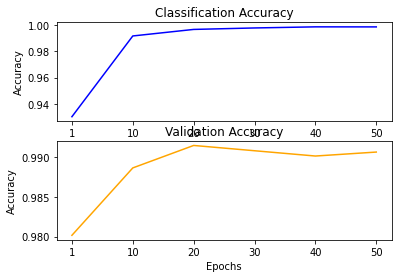

In [25]:
# plot accuracy
plt.subplot(2, 1, 1)
plt.title('Classification Accuracy')
y_axis= ('1','10','20','30','40','50')
y_pos= np.arange(len(y_axis))
plt.plot(y_pos, accuracy, color='blue', label='validation')
plt.xticks(y_pos, y_axis)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
	
# plot validation accuracy
plt.subplot(2, 1, 2)
plt.title('Validation Accuracy')
y_axis= ('1','10','20','30','40','50')
y_pos= np.arange(len(y_axis))
plt.plot(y_pos, val_accuracy, color='orange', label='validation')
plt.xticks(y_pos, y_axis)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
 
plt.show()

iii) Add another convolution layer & maxpooling layer

In [ ]:
def create_cnn3 ():
# define using Sequential
  model = Sequential ( )
  # Convolution layer
  model.add(
    Conv2D(32,(3,3),
    activation= 'relu',
    kernel_initializer = 'he_uniform',
    input_shape =(28 , 28 , 1))
    )
  # Maxpooling layer
  model.add(MaxPooling2D( ( 2,2) ) )
  # Another convolution layer with 64 output filter
  model.add(Conv2D(64, (3, 3), activation='relu', 
                   kernel_initializer='he_uniform'))
  # Another Maxpooling layer
  model.add(MaxPooling2D((2, 2)))
  # Flatten output
  model.add(Flatten ( ) )
  # drop out random units
  model.add(Dropout(0.5))
  # Dense layer of 100 neurons
  model.add(
    Dense (100 ,
    activation= 'relu' ,
    kernel_initializer = 'he_uniform' )
    )
  model.add(Dense(10 , activation= 'softmax'))
  # initialize optimizer
  opt = SGD(learning_rate =0.01 , momentum=0.9)
  # compile model
  model.compile(
    optimizer=opt ,
    loss= 'categorical_crossentropy' ,
    metrics =[ 'accuracy' ]
    )
  return model

In [ ]:
model3=create_cnn3 ()

In [ ]:
model3.fit(train_X_norm, train_Y,batch_size =32,epochs =10,
           validation_split =0.1)

Epoch 1/10
1688/1688 [==============================] - 43s 25ms/step - loss: 0.1999 - accuracy: 0.9361 - val_loss: 0.0602 - val_accuracy: 0.9815
Epoch 2/10
1688/1688 [==============================] - 42s 25ms/step - loss: 0.0812 - accuracy: 0.9751 - val_loss: 0.0433 - val_accuracy: 0.9873
Epoch 3/10
1688/1688 [==============================] - 42s 25ms/step - loss: 0.0601 - accuracy: 0.9812 - val_loss: 0.0364 - val_accuracy: 0.9900
Epoch 4/10
1688/1688 [==============================] - 41s 25ms/step - loss: 0.0508 - accuracy: 0.9837 - val_loss: 0.0297 - val_accuracy: 0.9907
Epoch 5/10
1688/1688 [==============================] - 42s 25ms/step - loss: 0.0467 - accuracy: 0.9854 - val_loss: 0.0325 - val_accuracy: 0.9905
Epoch 6/10
1688/1688 [==============================] - 42s 25ms/step - loss: 0.0411 - accuracy: 0.9871 - val_loss: 0.0290 - val_accuracy: 0.9907
Epoch 7/10
1688/1688 [==============================] - 42s 25ms/step - loss: 0.0368 - accuracy: 0.9884 - val_loss: 0.0281 -

In [ ]:
score3 = model3.evaluate ( test_X_norm , test_Y , verbose =0)
print (score3)

[0.026333706453442574, 0.9911999702453613]


iv) Experiment in learning rate

a. Learning rate = 0.001

In [ ]:
def create_cnn4 ():
# define using Sequential
  model = Sequential ( )
  # Convolution layer
  model.add(
    Conv2D(32,(3,3),
    activation= 'relu',
    kernel_initializer = 'he_uniform',
    input_shape =(28 , 28 , 1))
    )
  # Maxpooling layer
  model.add(MaxPooling2D( ( 2,2) ) )
  # Another convolution layer with 64 output filter
  model.add(Conv2D(64, (3, 3), activation='relu', 
                   kernel_initializer='he_uniform'))
  # Another Maxpooling layer
  model.add(MaxPooling2D((2, 2)))
  # Flatten output
  model.add(Flatten ( ) )
  # drop out random units
  model.add(Dropout(0.5))
  # Dense layer of 100 neurons
  model.add(
    Dense (100 ,
    activation= 'relu' ,
    kernel_initializer = 'he_uniform' )
    )
  model.add(Dense(10 , activation= 'softmax'))
  # initialize optimizer
  opt = SGD(learning_rate =0.001 , momentum=0.9)
  # compile model
  model.compile(
    optimizer=opt ,
    loss= 'categorical_crossentropy' ,
    metrics =[ 'accuracy' ]
    )
  return model

In [ ]:
model4=create_cnn4 ()

In [ ]:
model4.fit(train_X_norm, train_Y,batch_size =32,epochs =10,
           validation_split =0.1)

Epoch 1/10
1688/1688 [==============================] - 45s 26ms/step - loss: 0.4172 - accuracy: 0.8681 - val_loss: 0.1060 - val_accuracy: 0.9715
Epoch 2/10
1688/1688 [==============================] - 44s 26ms/step - loss: 0.1686 - accuracy: 0.9473 - val_loss: 0.0803 - val_accuracy: 0.9777
Epoch 3/10
1688/1688 [==============================] - 44s 26ms/step - loss: 0.1316 - accuracy: 0.9596 - val_loss: 0.0670 - val_accuracy: 0.9807
Epoch 4/10
1688/1688 [==============================] - 44s 26ms/step - loss: 0.1100 - accuracy: 0.9662 - val_loss: 0.0613 - val_accuracy: 0.9825
Epoch 5/10
1688/1688 [==============================] - 44s 26ms/step - loss: 0.0961 - accuracy: 0.9706 - val_loss: 0.0511 - val_accuracy: 0.9863
Epoch 6/10
1688/1688 [==============================] - 44s 26ms/step - loss: 0.0865 - accuracy: 0.9737 - val_loss: 0.0472 - val_accuracy: 0.9873
Epoch 7/10
1688/1688 [==============================] - 45s 26ms/step - loss: 0.0822 - accuracy: 0.9749 - val_loss: 0.0435 -

In [ ]:
score4 = model4.evaluate ( test_X_norm , test_Y , verbose =0)
print (score4)

[0.03706914186477661, 0.9873999953269958]


b. Learning rate = 0.1

In [19]:
def create_cnn5 ():
# define using Sequential
  model = Sequential ( )
  # Convolution layer
  model.add(
    Conv2D(32,(3,3),
    activation= 'relu',
    kernel_initializer = 'he_uniform',
    input_shape =(28 , 28 , 1))
    )
  # Maxpooling layer
  model.add(MaxPooling2D( ( 2,2) ) )
  # Another convolution layer with 64 output filter
  model.add(Conv2D(64, (3, 3), activation='relu', 
                   kernel_initializer='he_uniform'))
  # Another Maxpooling layer
  model.add(MaxPooling2D((2, 2)))
  # Flatten output
  model.add(Flatten ( ) )
  # drop out random units
  model.add(Dropout(0.5))
  # Dense layer of 100 neurons
  model.add(
    Dense (100 ,
    activation= 'relu' ,
    kernel_initializer = 'he_uniform' )
    )
  model.add(Dense(10 , activation= 'softmax'))
  # initialize optimizer
  opt = SGD(learning_rate =0.1 , momentum=0.9)
  # compile model
  model.compile(
    optimizer=opt ,
    loss= 'categorical_crossentropy' ,
    metrics =[ 'accuracy' ]
    )
  return model

In [ ]:
model5=create_cnn5 ()

In [ ]:
model5.fit(train_X_norm, train_Y,batch_size =32,epochs =10,
           validation_split =0.1)

Epoch 1/10
1688/1688 [==============================] - 44s 26ms/step - loss: 1.1727 - accuracy: 0.6614 - val_loss: 0.8609 - val_accuracy: 0.7157
Epoch 2/10
1688/1688 [==============================] - 44s 26ms/step - loss: 1.7653 - accuracy: 0.4052 - val_loss: 2.3056 - val_accuracy: 0.1045
Epoch 3/10
1688/1688 [==============================] - 44s 26ms/step - loss: 2.3079 - accuracy: 0.1048 - val_loss: 2.3085 - val_accuracy: 0.1000
Epoch 4/10
1688/1688 [==============================] - 43s 26ms/step - loss: 2.3084 - accuracy: 0.1049 - val_loss: 2.3061 - val_accuracy: 0.1045
Epoch 5/10
1688/1688 [==============================] - 43s 26ms/step - loss: 2.3085 - accuracy: 0.1050 - val_loss: 2.3054 - val_accuracy: 0.0995
Epoch 6/10
1688/1688 [==============================] - 43s 25ms/step - loss: 2.3083 - accuracy: 0.1040 - val_loss: 2.3118 - val_accuracy: 0.1045
Epoch 7/10
1688/1688 [==============================] - 43s 25ms/step - loss: 2.3091 - accuracy: 0.1045 - val_loss: 2.3096 -

In [ ]:
score5 = model5.evaluate ( test_X_norm , test_Y , verbose =0)
print (score5)

[2.305046796798706, 0.10100000351667404]


# f. Analysis

i) Explain how the trends in validation and train accuracy change after using the dropout layer in the experiments.
- After adding the dropout layer, the train accuracy trend does not really change because it becomes very close to 1 after 10 epoches just as before; however, the validation accuracy kept improving when we increase the epoches, unlike before the validation accuracy stops improving after 10 epochs and even decreased with more training.



ii) How does the performance of CNN with two convolution layers differ as compared to CNN with a single convolution layer in your experiments?
- The test accuracy improved after addinng 2 convolution layers, showing better performance of this deeper CNN model.



iii) How did changing learning rates change your experimental results in part (iv)?
- Using learning rate of 0.001 does not improve the test accuracy much, while using learning rate of 0.1 make the test accuracy become extremely low. Therefore it is appropriate t ouse the leaning rate of 0.01 for both accuracy and efficiency purpose.